# Basic Recommender System
### A Movie Recommender

This Movie Recommender is based on **Content Based** recommendations rather than **Collaborative Filtering**.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  Getting the Data

The Rating is based on **Movie Id** in one dataset while the **Movie Title** corresponding to the IDs are in another dataset so we merge them.

In [71]:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data',names = column_names, delimiter= '\t')
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [72]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [73]:
df = df.merge(movie_titles, on= 'item_id')

In [74]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploratory Analysis

In [75]:
sns.set_style('whitegrid')

Looking at **Highest Rated Movies**

In [76]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

Looking at **Most Rated Movies**

In [77]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

Forming a DataFrame with **Movie Titles** with their **Ratings** and **Number of Ratings**

In [78]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [79]:
rating['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [80]:
rating.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Visualising The Number of Ratings

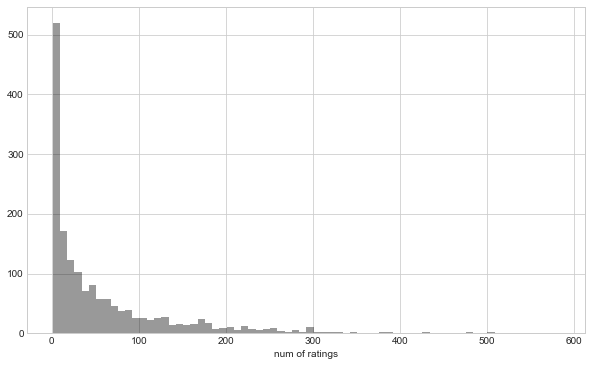

In [81]:
plt.figure(figsize= (10,6))
sns.distplot(rating['num of ratings'], bins = 70, kde = False, color= 'black')

It can be observed that very few movies have been rated more than 100 times.

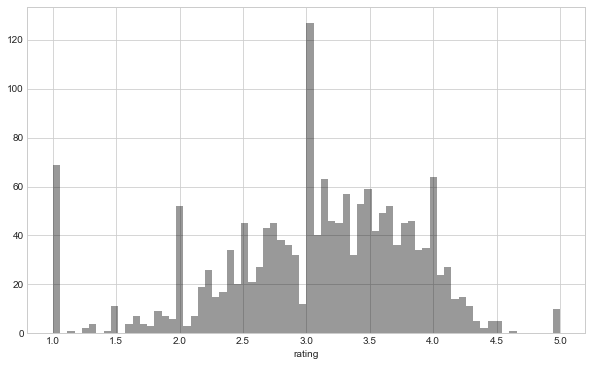

In [82]:
plt.figure(figsize= (10,6))
sns.distplot(rating['rating'], bins = 70, kde = False, color= 'black')

The few high towers show the movie which have been rated by very few number of people.

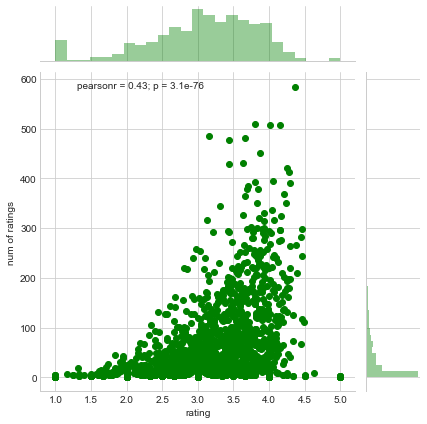

In [83]:
sns.jointplot(rating['rating'], rating['num of ratings'], color = 'green')

The above plot shows that movies which have good rating have more number of ratings as well which perfectly makes sense.

## Recommending Movies

Creating a matrix having user ids on one axis and the movie title on another axis.  
And the data being the corresponding rating.

In [84]:
moviemat = df.pivot_table(values = 'rating', index = 'user_id', columns= 'title')

In [85]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The large number of **NaN** values can be explained as there are most users who have not watched many movies.

In [86]:
rating.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


For instance we pick two movie based on which we want the recommendations.  
**Return of the Jedi(1983)**  
**Scream (1996)** 

In [87]:
return_of_the_jedi_ratings = moviemat['Return of the Jedi (1983)']
scream_ratings = moviemat['Scream (1996)']

In [88]:
return_of_the_jedi_ratings.head()

user_id
0    NaN
1    5.0
2    NaN
3    4.0
4    NaN
Name: Return of the Jedi (1983), dtype: float64

Using **corrwith()** to get the correlation between two pandas series.

In [89]:
similar_to_jedi = moviemat.corrwith(return_of_the_jedi_ratings)
similar_to_scream = moviemat.corrwith(scream_ratings)

C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [90]:
corr_jedi = pd.DataFrame(similar_to_jedi,columns= ['Correlation'])
corr_jedi.dropna(inplace = True)
corr_jedi.head()

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-0.828079
101 Dalmatians (1996),0.165659
12 Angry Men (1957),-0.026169
187 (1997),0.064155


In [91]:
corr_jedi.sort_values('Correlation',ascending = False).head()

,Correlation
title,
Stripes (1981),1.0
Guantanamera (1994),1.0
Manny & Lo (1996),1.0
"Quiet Room, The (1996)",1.0
Return of the Jedi (1983),1.0


We can observe that some movies have perfect correlation with the chosen movies.  
This is due to some movies have been rated by only a few people with high rating.

So we can filter out movies with number of rating less than a certain number.

In [92]:
corr_jedi = corr_jedi.join(rating['num of ratings'])
corr_jedi.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41


### Now we get the movies similar to Return of the Jedi

In [93]:
x =corr_jedi[corr_jedi['num of ratings'] > 100].sort_values('Correlation',ascending = False).head()

In [94]:
x.reset_index(inplace = True)

In [105]:
top5s = np.array(x.title)

In [107]:
i = 0
for movie in top5s:
    i = i+1
    if i == 1:
        continue
    else:
        print(movie)

Empire Strikes Back, The (1980)
Star Wars (1977)
Raiders of the Lost Ark (1981)
Indiana Jones and the Last Crusade (1989)


### Doing Same for Scream

In [ ]:
corr_scream = pd.DataFrame(similar_to_scream,columns= ['Correlation'])
corr_scream.dropna(inplace = True)
corr_scream.head()
corr_scream.sort_values('Correlation',ascending = False).head()
corr_scream = corr_scream.join(rating['num of ratings'])
corr_scream.head()
corr_scream[corr_scream['num of ratings'] > 100].sort_values('Correlation',ascending = False).head()

In [111]:
rating.reset_index(inplace =True)

In [112]:
rating['title']

0                               'Til There Was You (1997)
1                                            1-900 (1994)
2                                   101 Dalmatians (1996)
3                                     12 Angry Men (1957)
4                                              187 (1997)
5                             2 Days in the Valley (1996)
6                     20,000 Leagues Under the Sea (1954)
7                            2001: A Space Odyssey (1968)
8             3 Ninjas: High Noon At Mega Mountain (1998)
9                                    39 Steps, The (1935)
10                                           8 1/2 (1963)
11                         8 Heads in a Duffel Bag (1997)
12                                       8 Seconds (1994)
13                                  A Chef in Love (1996)
14                                   Above the Rim (1994)
15                                  Absolute Power (1997)
16                                      Abyss, The (1989)
17            

### And we can see that the recommendations make a lot of Sense!